In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
qc_data = pd.read_csv('Datasets/quality_data_ng.csv')
qc_data.head()
qc_data.tail()

,Test 1,Test 2,Accept
0,0.05,0.70,1
1,-0.09,0.68,1
2,-0.21,0.69,1
3,-0.38,0.50,1
4,-0.51,0.47,1


,Test 1,Test 2,Accept
113,-0.72,0.54,0
114,-0.59,0.49,0
115,-0.48,1.00,0
116,-0.01,1.00,0
117,0.63,-0.03,0


Text(0.5, 0, 'Test 1')

Text(0, 0.5, 'Test 2')

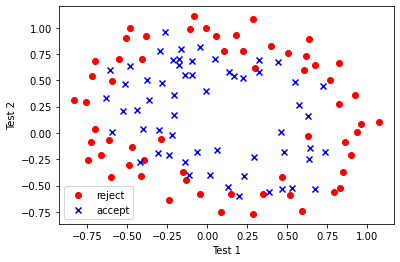

In [3]:
# plot the features against the classification
X0 = qc_data[qc_data['Accept'] == 0]
X1 = qc_data[qc_data['Accept'] == 1]
plt.scatter(X0['Test 1'], X0['Test 2'], color = 'red', marker = 'o', label = 'reject')
plt.scatter(X1['Test 1'], X1['Test 2'], color = 'blue', marker = 'x', label = 'accept')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc='lower left')
plt.show()

In [4]:
qc_data['t1_sq'] = qc_data['Test 1']**2
qc_data['t2_sq'] = qc_data['Test 2']**2
qc_data['t1_t2'] = qc_data['Test 1']*qc_data['Test 2']
qc_data.head()
qc_data.tail()

,Test 1,Test 2,Accept,t1_sq,t2_sq,t1_t2
0,0.05,0.70,1,0.00,0.49,0.04
1,-0.09,0.68,1,0.01,0.47,-0.06
2,-0.21,0.69,1,0.05,0.48,-0.15
3,-0.38,0.50,1,0.14,0.25,-0.19
4,-0.51,0.47,1,0.26,0.22,-0.24


,Test 1,Test 2,Accept,t1_sq,t2_sq,t1_t2
113,-0.72,0.54,0,0.52,0.29,-0.39
114,-0.59,0.49,0,0.35,0.24,-0.29
115,-0.48,1.00,0,0.23,1.00,-0.48
116,-0.01,1.00,0,0.00,1.00,-0.01
117,0.63,-0.03,0,0.40,0.00,-0.02


In [5]:
qc_data.isna().sum()


Test 1    0
Test 2    0
Accept    0
t1_sq     0
t2_sq     0
t1_t2     0
dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(qc_data.drop(columns = ['Accept']), qc_data['Accept'], test_size=0.2, stratify = qc_data['Accept'], random_state=50)

# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train
y_test

,Test 1,Test 2,t1_sq,t2_sq,t1_t2
11,0.53,-0.52,0.28,0.27,-0.28
53,-0.21,0.36,0.04,0.13,-0.07
24,-0.12,-0.40,0.01,0.16,0.05
75,0.52,-0.59,0.27,0.35,-0.31
38,0.06,-0.16,0.00,0.03,-0.01
...,...,...,...,...,...
59,0.22,0.78,0.05,0.61,0.17
81,-0.13,-0.45,0.02,0.20,0.06
48,0.44,0.67,0.20,0.45,0.30
47,0.22,0.52,0.05,0.27,0.12


,Test 1,Test 2,t1_sq,t2_sq,t1_t2
69,0.86,-0.08,0.75,0.01,-0.07
90,-0.51,0.90,0.26,0.82,-0.46
57,-0.14,-0.27,0.02,0.07,0.04
19,-0.48,0.63,0.23,0.40,-0.30
9,0.13,-0.51,0.02,0.26,-0.07
64,0.77,0.50,0.59,0.25,0.38
0,0.05,0.70,0.00,0.49,0.04
54,-0.21,0.17,0.04,0.03,-0.04
45,0.58,0.27,0.33,0.07,0.15
55,-0.44,0.22,0.19,0.05,-0.10


11    1
53    1
24    1
75    0
38    1
     ..
59    0
81    0
48    1
47    1
15    1
Name: Accept, Length: 94, dtype: int64

69     0
90     0
57     1
19     1
9      1
64     0
0      1
54     1
45     1
55     1
91     0
1      1
80     0
110    0
23     1
106    0
62     0
95     0
88     0
29     1
103    0
114    0
37     1
43     1
Name: Accept, dtype: int64

In [18]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = 'l2', C = 10.0)
# If the lbfgs throws an error, try to increase max_iter (add max_iter = 1000), also try another algorithm, scaling is also suggested
# While using multiclass case do multi_class = 'over' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LogisticRegression(C=10.0)

0.8617021276595744

array([[ 1.53493272,  2.31050017, -6.51208051, -6.42211913, -4.06982797]])

array([2.86969646])

In [8]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Accept'])
test_output.head()

,pred_Accept
69,0
90,0
57,1
19,1
9,1


In [9]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Accept,Accept
69,0,0
90,0,0
57,1,1
19,1,1
9,1,1


Percentage of correct predictions is 
0.8333333333333334


In [10]:
test_output = test_output.merge(X_test, left_index = True, right_index = True)
test_output.head()

,pred_Accept,Accept,Test 1,Test 2,t1_sq,t2_sq,t1_t2
69,0,0,0.86,-0.08,0.75,0.01,-0.07
90,0,0,-0.51,0.90,0.26,0.82,-0.46
57,1,1,-0.14,-0.27,0.02,0.07,0.04
19,1,1,-0.48,0.63,0.23,0.40,-0.30
9,1,1,0.13,-0.51,0.02,0.26,-0.07


In [11]:
model.predict_proba(qc_data.drop(columns = ['Accept']))


array([[9.42934062e-02, 9.05706594e-01],
       [5.84685628e-02, 9.41531437e-01],
       [6.83616289e-02, 9.31638371e-01],
       [3.93531504e-02, 9.60646850e-01],
       [1.17179437e-01, 8.82820563e-01],
       [1.67695175e-01, 8.32304825e-01],
       [9.71695153e-02, 9.02830485e-01],
       [2.37976290e-01, 7.62023710e-01],
       [2.01803590e-01, 7.98196410e-01],
       [4.08755848e-01, 5.91244152e-01],
       [4.77377575e-01, 5.22622425e-01],
       [4.21563156e-01, 5.78436844e-01],
       [1.22931430e-01, 8.77068570e-01],
       [2.46600965e-01, 7.53399035e-01],
       [3.92349445e-01, 6.07650555e-01],
       [1.31083561e-01, 8.68916439e-01],
       [2.85831858e-02, 9.71416814e-01],
       [2.67734209e-01, 7.32265791e-01],
       [6.90844513e-02, 9.30915549e-01],
       [1.61060483e-01, 8.38939517e-01],
       [3.71712087e-01, 6.28287913e-01],
       [3.74154218e-01, 6.25845782e-01],
       [7.08415489e-01, 2.91584511e-01],
       [8.18361860e-01, 1.81638140e-01],
       [3.943581

In [12]:
data_with_prob = X_train.copy()
data_with_prob['Accept'] = y_train

# Next we give the probability of predicting 1 (in multiclass, there will be probabilities by class)
data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Accept']))[:,1]

data_with_prob.head()

,Test 1,Test 2,t1_sq,t2_sq,t1_t2,Accept,Probability
11,0.53,-0.52,0.28,0.27,-0.28,1,0.58
53,-0.21,0.36,0.04,0.13,-0.07,1,0.99
24,-0.12,-0.40,0.01,0.16,0.05,1,0.61
75,0.52,-0.59,0.27,0.35,-0.31,0,0.35
38,0.06,-0.16,0.00,0.03,-0.01,1,0.99


In [13]:
test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Accept', 'pred_Accept']))[:,1]
test_output.head()

,pred_Accept,Accept,Test 1,Test 2,t1_sq,t2_sq,t1_t2,Probability
69,0,0,0.86,-0.08,0.75,0.01,-0.07,0.35
90,0,0,-0.51,0.90,0.26,0.82,-0.46,0.24
57,1,1,-0.14,-0.27,0.02,0.07,0.04,0.87
19,1,1,-0.48,0.63,0.23,0.40,-0.30,0.84
9,1,1,0.13,-0.51,0.02,0.26,-0.07,0.59


#### Visualize data

Text(0.5, 0, 'Test 1')

Text(0, 0.5, 'Test 2')

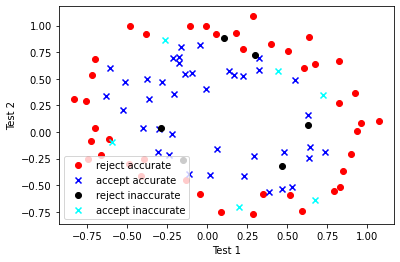

In [14]:
# plot the features against the classification [Training]
X0_right = data_with_prob[(data_with_prob['Accept'] == 0) & (data_with_prob['Probability'] < 0.5)]
X1_right = data_with_prob[(data_with_prob['Accept'] == 1) & (data_with_prob['Probability'] >= 0.5)]
X0_wrong = data_with_prob[(data_with_prob['Accept'] == 0) & (data_with_prob['Probability'] >= 0.5)]
X1_wrong = data_with_prob[(data_with_prob['Accept'] == 1) & (data_with_prob['Probability'] < 0.5)]

plt.scatter(X0_right['Test 1'], X0_right['Test 2'], color = 'red', marker = 'o', label = 'reject accurate')
plt.scatter(X1_right['Test 1'], X1_right['Test 2'], color = 'blue', marker = 'x', label = 'accept accurate')
plt.scatter(X0_wrong['Test 1'], X0_wrong['Test 2'] + 0.1, color = 'black', marker = 'o', label = 'reject inaccurate')
plt.scatter(X1_wrong['Test 1'], X1_wrong['Test 2'] - 0.1, color = 'cyan', marker = 'x', label = 'accept inaccurate')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc='lower left')
plt.show()

Text(0.5, 0, 'Test 1')

Text(0, 0.5, 'Test 2')

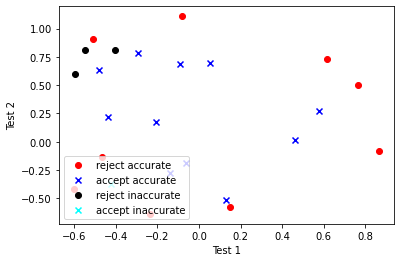

In [15]:
# plot the features against the classification [Testing]
X0_right = test_output[(test_output['Accept'] == 0) & (test_output['Probability'] < 0.5)]
X1_right = test_output[(test_output['Accept'] == 1) & (test_output['Probability'] >= 0.5)]
X0_wrong = test_output[(test_output['Accept'] == 0) & (test_output['Probability'] >= 0.5)]
X1_wrong = test_output[(test_output['Accept'] == 1) & (test_output['Probability'] < 0.5)]

plt.scatter(X0_right['Test 1'], X0_right['Test 2'], color = 'red', marker = 'o', label = 'reject accurate')
plt.scatter(X1_right['Test 1'], X1_right['Test 2'], color = 'blue', marker = 'x', label = 'accept accurate')
plt.scatter(X0_wrong['Test 1'], X0_wrong['Test 2'] + 0.1, color = 'black', marker = 'o', label = 'reject inaccurate')
plt.scatter(X1_wrong['Test 1'], X1_wrong['Test 2'] - 0.1, color = 'cyan', marker = 'x', label = 'accept inaccurate')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc='lower left')
plt.show()